In [35]:
from sklearn import linear_model
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as dt

addr = "C:\\Users\\44128436\\Desktop\\Projects\\Cash Flow\\Data\\"

#trans = pd.read_csv(addr + 'Transaction.csv', encoding = 'utf-8')
bal = pd.read_csv(addr + 'Balance.csv', encoding = 'utf-8')
bal.head()

,Customer Country,Business Class Classification Code,Masked Customer Number,Masked Customer Name,Customer Start Date,Masked HORIS MasterGroup Name,LoB Level 3,LoB Level 4,Masked Account Number,Account Type Code,Account Currency Code,Calendar Date,Ledger Balance,Ledger Balance in Local Currency,Ledger Balance(USD Equivalent)
0,IN,CIBM,******342,XXX******,3/3/2007,Cusstomer E,GB-CORP,GB,******371******,D,USD,1/5/2017,0.00,0.000,0.000
1,IN,CIBM,******342,XXX******,3/3/2007,Cusstomer E,GB-CORP,GB,******171******,D,EUR,1/10/2017,0.00,0.000,0.000
2,CN,CIBM,******548,MER******,3/16/2012,Cusstomer C,GB-CORP,NaN,******073******,D,CNY,1/12/2017,0.00,0.000,0.000
3,IN,CIBM,******728,XXX******,5/11/2010,Cusstomer E,GB-CORP,GB,******237******,D,EUR,1/28/2017,18576.98,1352013.767,19870.867
4,CN,CIBM,******145,TEC******,12/21/2007,Cusstomer E,GB-CORP,NaN,******071******,D,CNY,1/17/2017,2320724.80,2320724.800,337668.025


In [36]:
trans = pd.read_csv(addr + 'Transaction.csv', encoding = 'utf-8')
trans.head()

,Customer Country,Business Class Classification Code,Masked Customer Number,Masked Customer Name,Customer Start Date,Masked HORIS MasterGroup Name,LoB Level 3,LoB Level 4,Masked Account Number,Account Type Code,...,Bank Drawee Correspondent Number,Transaction Transmit Date Time,Message Inward Number,Transaction Inward Reference Number,Message Transmission Type Code,Message Type Code,Payment Instruction Process Type Code,Charge Option (Tag 71a),Beneficiary Country Code,Remitter Bank Name
0,CN,CIBM,******949,CAR******,9/14/2007,Cusstomer B,GB-CORP,NaN,******000******,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN,CIBM,******146,XXX******,6/28/2011,Cusstomer B,GB-CORP,GB,******810******,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IN,CIBM,******927,XXX******,2/2/2009,Cusstomer C,GB-CORP,GB,******810******,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN,CIBM,******927,XXX******,2/2/2009,Cusstomer C,GB-CORP,GB,******810******,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IN,CIBM,******927,XXX******,2/2/2009,Cusstomer C,GB-CORP,GB,******810******,D,...,ICIB,1/3/2017 16:55,HKBA03KC1BMQ0541,9511I8D1H3KG,LPS,100.0,NaN,BEN\n,NaN,NaN


In [ ]:
for d in trans['Transaction Capture Date Time']:
    d = d[:d.find(' ')]

for i in range(len(trans['Transaction Capture Date Time'])):
    d = trans['Transaction Capture Date Time'][i]
    trans['Transaction Capture Date Time'].replace({d: d[:d.find(' ')]}) 
trans['Transaction Capture Date Time']

In [25]:
'''
customerNumber = ['******077','******030']
masterGroup = ['Cusstomer B']
accountNumber = ['******016******']
currency = ['USD','CNY']
'''


In [44]:
filteredBal = bal.loc[(bal['Masked Customer Number']=='******146') & (bal['Masked HORIS MasterGroup Name'] == 'Cusstomer B') & (bal['Masked Account Number']=='******810******') & (bal['Account Currency Code']=='INR')]

X = filteredBal['Ledger Balance in Local Currency'].tolist()
Y = filteredBal['Calendar Date'].tolist()
print(X)
print(Y)
print(len(X))
print(len(Y))
'''
delX_li = list()
delY_li = list()
for i in range(0,len(X)):
    if i > 0:
        for j in range(0,i):
            if X[i] == X[j]:
                delX_li.append(X[i])
                delY_li.append(Y[i])
                
print(del_li)
for i in range(0,len(del_li)):
    X.remove(delX_li[i])
    Y.remove(delY_li[i])
    break
X
Y
'''

[35880406.7, 60880406.7, 35880406.7, 2756661.62, 60880406.7, 55880406.7, 60880406.7, 5617887.28, 35880406.7, 35880406.7, 2756661.62, 2650450.52, 35880406.7, 35880406.7, 6709557.28, 4354175.35, 35880406.7, 3992333.97, 4169166.6, 6803910.95, 35880406.7, 35880406.7, 35880406.7, 3467628.97, 120880406.7, 60880406.7, 5184999.46, 6919592.62, 5262886.87, 35880406.7, 2576970.32, 35880406.7, 6694127.1, 35880406.7, 60880406.7, 3078562.17, 4425906.76, 35880406.7, 50880406.7, 50880406.7, 35880406.7, 2957663.59, 60880406.7, 4425906.76, 5100001.87, 35880406.7, 35880406.7, 95880406.7, 35880406.7, 4425906.76, 6017494.92, 2512277.35, 3391514.17, 6694127.1, 2957663.59, 35880406.7, 45880406.7, 3078562.17, 6694127.1, 5529346.31, 7291263.04, 6338479.44]
['1/13/2017', '1/29/2017', '1/14/2017', '1/22/2017', '1/27/2017', '1/23/2017', '1/28/2017', '1/18/2017', '1/1/2017', '1/10/2017', '1/21/2017', '1/23/2017', '1/2/2017', '1/12/2017', '1/19/2017', '1/10/2017', '1/18/2017', '1/3/2017', '1/9/2017', '1/17/2017', '

'\ndelX_li = list()\ndelY_li = list()\nfor i in range(0,len(X)):\n    if i > 0:\n        for j in range(0,i):\n            if X[i] == X[j]:\n                delX_li.append(X[i])\n                delY_li.append(Y[i])\n                \nprint(del_li)\nfor i in range(0,len(del_li)):\n    X.remove(delX_li[i])\n    Y.remove(delY_li[i])\n    break\nX\nY\n'

In [45]:
'''
filteredTrans = trans.loc[(trans['Masked Customer Number']=='******030') & (trans['Masked HORIS MasterGroup Name'] == 'Cusstomer B') & (trans['Masked Account Number']=='******003******') & (trans['Account Currency Code']=='USD')]

x = filteredTrans['Transaction Currency Local Amount'].tolist()
print(len(x))
'''

12


predictions = 23365754.103608, expectations = 35880406.700000
predictions = 40931466.525690, expectations = 2957663.590000
predictions = 32898133.371114, expectations = 60880406.700000
predictions = 48429099.705557, expectations = 4425906.760000
predictions = 10456892.938419, expectations = 5100001.870000
predictions = 14771355.759358, expectations = 35880406.700000
predictions = 35278963.431056, expectations = 35880406.700000
predictions = 36812559.547407, expectations = 95880406.700000
predictions = 39535344.182747, expectations = 35880406.700000
predictions = 36940869.280508, expectations = 4425906.760000
predictions = 38573033.417856, expectations = 6017494.920000
predictions = 27140751.371237, expectations = 2512277.350000
predictions = 18428561.685882, expectations = 3391514.170000
predictions = 3116838.849671, expectations = 6694127.100000
predictions = 24676731.386743, expectations = 2957663.590000
predictions = 34858083.493671, expectations = 35880406.700000
predictions = 3585

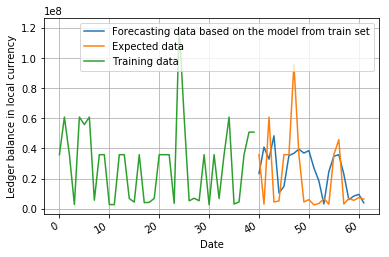

In [52]:
#training set using ARIMA
size = int(len(X)*0.66)
train, test = X[0:size],X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(0,len(test)):
    model = ARIMA(history, order = (8,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    history.append(obs)
    print('predictions = %f, expectations = %f' % (y_hat, obs))
err = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % err)

#plot
Y = range(len(Y))
plt.plot(Y[size:len(Y)], predictions, label = 'Forecasting data based on the model from train set')
plt.plot(Y[size:len(Y)], test, label = 'Expected data')
plt.plot(Y[0:size], train, label = 'Training data')
plt.xlabel('Date')
plt.ylabel('Ledger balance in local currency')
plt.grid()
plt.legend(loc = 'upper right')
plt.gcf().autofmt_xdate()
plt.show()


In [40]:
# implement more models

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error


agg = {
        'Ledger Balance in Local Currency': 'sum'
    }
aggBal = bal.groupby(['Masked HORIS MasterGroup Name', 'Calendar Date']).agg(agg)

#group = balSum(bal, 'Masked HORIS MasterGroup Name', 'Calendar Date', 'Ledger Balance in Local Currency')
aggBal = aggBal.reset_index()
aggBal

,Masked HORIS MasterGroup Name,Calendar Date,Ledger Balance in Local Currency
0,Cusstomer B,1/1/2017,2.076378e+09
1,Cusstomer B,1/10/2017,1.948877e+09
2,Cusstomer B,1/11/2017,1.905747e+09
3,Cusstomer B,1/12/2017,1.782494e+09
4,Cusstomer B,1/13/2017,1.677023e+09
5,Cusstomer B,1/14/2017,1.677023e+09
6,Cusstomer B,1/15/2017,1.677023e+09
7,Cusstomer B,1/16/2017,1.616776e+09
8,Cusstomer B,1/17/2017,1.501492e+09
9,Cusstomer B,1/18/2017,1.449884e+09


In [41]:
agg = {
    'Transaction Currency Local Amount': 'sum'
}
aggTrans = trans.groupby(['Masked HORIS MasterGroup Name', 'Transaction Capture Date Time']).agg(agg)
aggTrans = aggTrans.reset_index()
aggTrans

,Masked HORIS MasterGroup Name,Transaction Capture Date Time,Transaction Currency Local Amount
0,Cusstomer B,1/10/2017 0:00,4.323240e+08
1,Cusstomer B,1/10/2017 10:00,6.121345e+05
2,Cusstomer B,1/10/2017 10:02,2.000000e+05
3,Cusstomer B,1/10/2017 10:05,4.000000e+05
4,Cusstomer B,1/10/2017 10:20,4.331340e+04
5,Cusstomer B,1/10/2017 10:23,2.081382e+08
6,Cusstomer B,1/10/2017 10:24,8.999500e+04
7,Cusstomer B,1/10/2017 10:29,-3.662840e+06
8,Cusstomer B,1/10/2017 10:41,1.099224e+05
9,Cusstomer B,1/10/2017 10:43,3.894800e+05


In [29]:
groupName = ['Cusstomer B', 'Cusstomer C', 'Cusstomer E', 'Cusstomer H']

class dt:
    def __init__(self, customer, date, balance, transaction):
        self.customer = customer
        self.date = date
        self.balance = balance
        self.transaction = transaction
        #inner class
        

if __name__ == '__main__':
    tp = dt('B',['dsf'],['sfds'],['sfdsf'])
            
d = {}

for i in range(len(groupName)):
    temp = None
    filterGroup = group.loc[(group['Masked HORIS MasterGroup Name']== groupName[i])]
    bal = filterGroup['Ledger Balance in Local Currency'].tolist()
    date = filterGroup['Calendar Date'].tolist()
    
    temp = dt(groupName[i],date,bal)
    d.append(temp)
    
    


d

TypeError: __init__() missing 1 required positional argument: 'transaction'

In [6]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as cs

Timeseries analysis -- to determine suitable lag

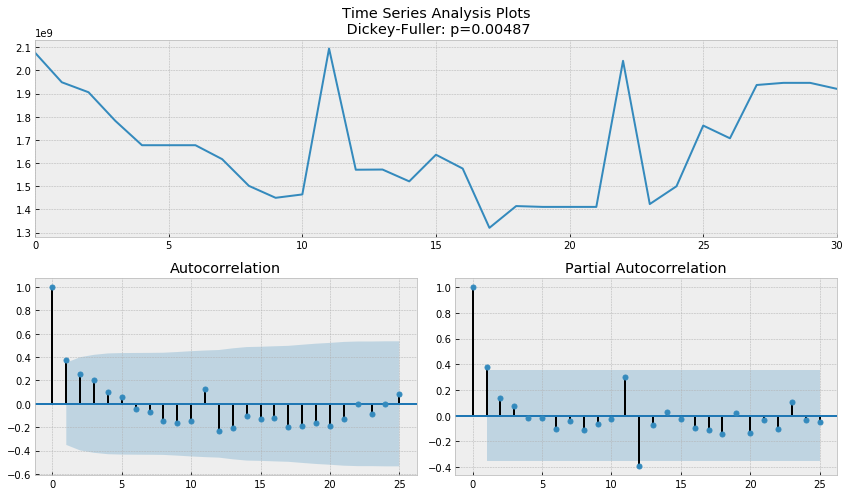

In [13]:
def tsplot(y, lags = None, figsize = (12,7), style = 'bmh'):
    if not isinstance(y,pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize = figsize)
        layout = (2,2)
        ts_ax  = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout,(1,0))
        pacf_ax = plt.subplot2grid(layout,(1,1))
        
        y.plot(ax = ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
    plt.show()
        
tsplot(dt[0],lags = 25)
    

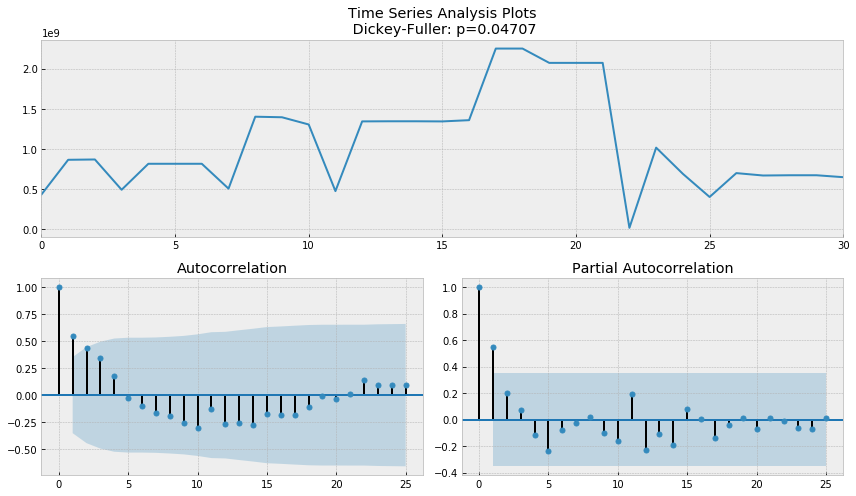

In [16]:
tsplot(dt[1],lags = 25)

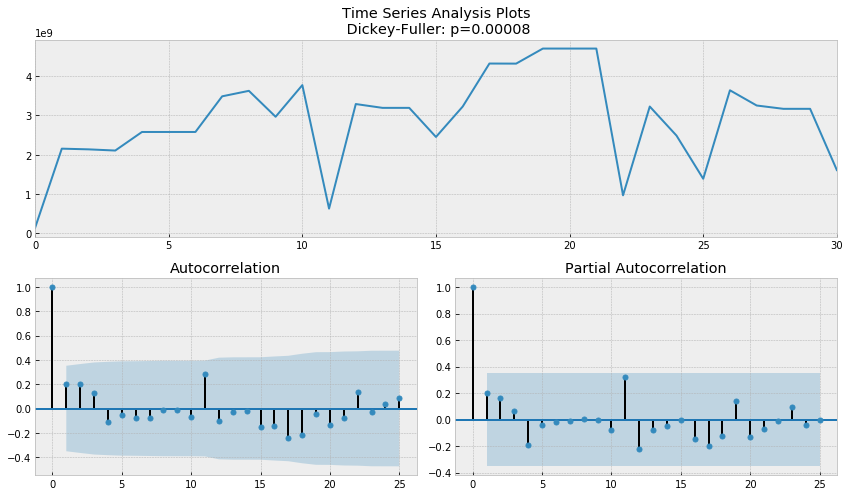

In [18]:
tsplot(dt[2],lags = 25)

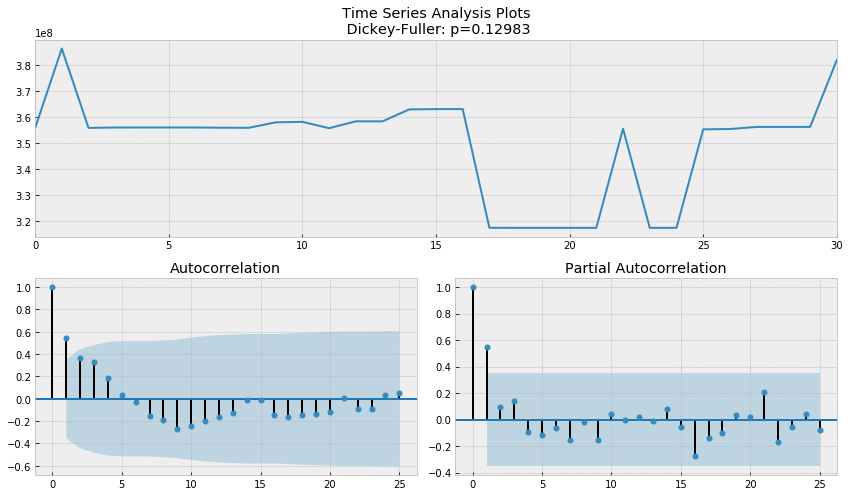

In [19]:
tsplot(dt[3],lags = 25)

In [45]:
dt[0]

[2076377795.2179997,
 1948877376.634,
 1905746804.5439997,
 1782494434.159,
 1677022885.738,
 1677022885.7379997,
 1677022885.738,
 1616775889.982,
 1501491789.8739996,
 1449884326.5880003,
 1464424710.7779999,
 2094402483.4279997,
 1571154085.685,
 1571985361.425,
 1520853641.6759999,
 1635981225.3209991,
 1576233468.1740005,
 1320190501.594,
 1414200096.6599998,
 1410628471.7399998,
 1410628471.7399998,
 1410628471.7399998,
 2041493586.6490002,
 1422857208.6599998,
 1499750160.85,
 1761846423.4150002,
 1706868179.637,
 1937073060.7510004,
 1946298507.401,
 1946298507.4010005,
 1920466947.636]

In [51]:
# create X and Y
#lag = [15, 12, 15, 15]
lag = [1,1,1,1]
Y_train = list()
Y_test = list()
X_train = list()
X_test = list()

def generateLag(arr,lag):
    df = pd.DataFrame({'arr':arr})
    tp = df['arr'].shift(lag).tolist()
    tp = tp[lag:]
    return tp


for i in range(0, len(dt)):
    X = dt[i]
    size = int(len(X)*0.66)
    Y_train.append(X[lag[i]:size])
    Y_test.append(X[size:len(X)])
    tp = generateLag(X,lag[i])
    X_train.append(tp[:(size-1)])
    X_test.append(tp[(size-1):])

print(len(Y_train[0]))
print(len(X_train[0]))
      

19
19


Lasso Regression with AR

In [48]:
alpha = 0.1
lasso = linear_model.Lasso(alpha = alpha)

In [54]:
for i in range(len(dt)):
    print(len(X_train[i]))
    print(len(Y_train[i]))
    print(len(X_test[i]))
    X_train = X_train[i].np.reshape(1,len(X_train[i]))
    Y_train = Y_train[i].reshape(1,len(Y_train[i]))
    X_test = X_test[i].reshape(1,len(X_test[i]))
    y_pred_lasso = lasso.fit(X_train, Y_train).predict(X_test)
    evs_lasso = explained_variance_score(Y_test, y_pred_lasso)
    mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
    r2_score_lasso = r2_score(Y_test, y_pred_lasso)
    print('************Lasso Result for group: ' + groupName[i] + '********')
    print(lasso)
    print("evs on test data : %f" % evs_lasso)
    print("mae on test data : %f" % mae_lasso)
    print("mse on test data : %f" % mse_lasso)
    print("r^2 on test data : %f" % r2_score_lasso)

19
19
11


AttributeError: 'list' object has no attribute 'np'

In [ ]:
evs_lasso = explained_variance_score(Y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_score_lasso = r2_score(Y_test, y_pred_lasso)

In [ ]:
print(lasso)
print("evs on test data : %f" % evs_lasso)
print("mae on test data : %f" % mae_lasso)
print("mse on test data : %f" % mse_lasso)
print("r^2 on test data : %f" % r2_score_lasso)